In [2]:
from experiment_helpers import *

In [3]:
EXPERIMENT_TYPES = [
    "linux_prefetching_asyncwrites",
    "tape_prefetching_asyncwrites",
]
WORKLOADS = ["python","mmult_eigen","mmult_eigen_par_2", "mmult_eigen_par_3", 
             "mmult_eigen_vec", "mmult_eigen_dot", "sparse_eigen"]

In [4]:
data3 = {}
for workload in WORKLOADS:
    data3[workload] = augment_tables(get_experiment_data(EXPERIMENT_TYPES, workload,"./3switch"), filter_raw=True)
    
data0 = {}
for workload in WORKLOADS:
    data0[workload] = augment_tables(get_experiment_data(EXPERIMENT_TYPES, workload,"./0switch"), filter_raw=True)    

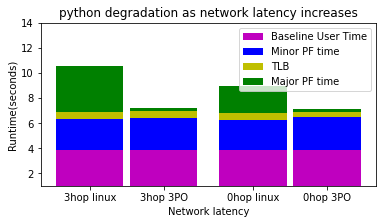

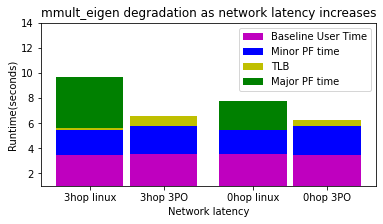

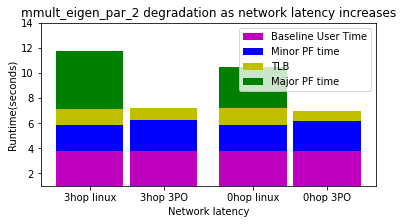

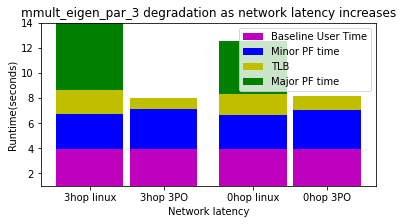

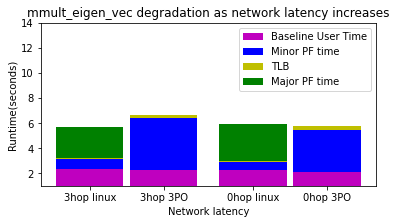

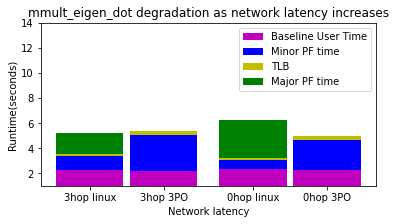

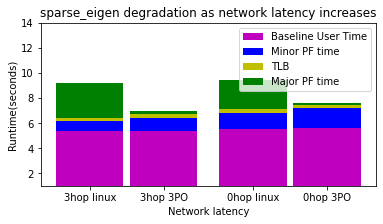

In [5]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# For recent conferences, I've had HotCRP complain about missing fonts unless I include this line
matplotlib.rcParams['pdf.fonttype'] = 42

for workload in WORKLOADS:
    plt.figure(figsize = (6, 3))

    i = -.5
    x_locs = []
    for data in [data3, data0]:
        table = data[workload]

        sub_tbl = table[["Eviction Time",
                         "Baseline minor PF Time",
                         "Extra Minor PF Time",
                         "Major PF Time",
                         "Baseline User Time",
                         "Extra User Time",
                                         ]] / 1e6
        sub_tbl["Experiment Name"] = table["Experiment Name"]

        width = 0.1

        for exp in set(sub_tbl["Experiment Name"]):
            RATIO = 30
            t = sub_tbl[(sub_tbl.index == RATIO) & (sub_tbl["Experiment Name"] == exp)]
            y1 = t["Baseline User Time"]
            y2 = (t["Baseline minor PF Time"].values + sub_tbl["Extra Minor PF Time"].values)[0]
            y3 = t["Extra User Time"]
            y4 = 0
#             y4 = t["Eviction Time"]
            y5 = t["Major PF Time"]

            x = i*0.11
            i+=1
            x_locs.append(x)
            plt.bar(x, y1, width=width, color='m')
            plt.bar(x, y2, width=width, bottom=y1, color='b')
            plt.bar(x, y3, width=width, bottom=y1+y2, color='y')
#             plt.bar(x, y4, width=width, bottom=y1+y2+y3, color='r')
            plt.bar(x, y5, width=width, bottom=y1+y2+y3+y4, color='g')
        i += 0.21

    plt.title("%s degradation as network latency increases" % workload)
    plt.ylim(bottom = 1, top = 14)
    plt.ylabel("Runtime(seconds)")
    plt.xlabel("Network latency")

    plt.xticks(x_locs, ["3hop linux", "3hop 3PO", "0hop linux", "0hop 3PO"])
    plt.legend(["Baseline User Time", "Minor PF time", "TLB",
#                 "Eviction Time",
                "Major PF time"])
    plt.show()